In [1]:
# 로이터 뉴스 데이터 로드를 함
from tensorflow.keras.datasets import reuters

# num_words = 1000 -> 단어의 빈도수가 1~1000 사이의 단어만 가져옴
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

In [2]:
print(X_train.shape, X_test.shape, X_train.shape[0]+X_test.shape[0])

(8982,) (2246,) 11228


In [3]:
import numpy as np

print(len(np.unique(y_train)))   #  46개의 카테고리 확인

46


In [4]:
# X_train 학습용 기사, y_train 뉴스의 카테고리 (48개 존재)
from tensorflow.keras.preprocessing import sequence

In [5]:
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)

In [6]:
X_train.shape

(8982, 100)

In [7]:
# y_train -> one-hot encoding
from tensorflow.keras.utils import to_categorical

y = to_categorical(y_train)
y.shape

(8982, 46)

In [20]:
# 데이터를 가지고 와서 기사마다 단어 수 맞춤 -> pad_sequences(X_train, maxlen=100)
# 모델 설정
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.callbacks import EarlyStopping
from attention import Attention

In [21]:
model = Sequential()
model.add(Embedding(1000, 100)) # 1000, 기사당 단어수 100
model.add(LSTM(100, activation='tanh'))  # LSTM 으로 RNN 구현
# model.add(Attention())
model.add(Dense(46, activation='softmax'))

model.summary()

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model.fit(X_train, y_train, epochs=200, batch_size=10, validation_data=(X_test, y_test), callbacks=[early_stopping])

ValueError: Exception encountered when calling layer "attention" (type Attention).

in user code:

    File "C:\Users\82103\anaconda3\envs\py3.8\lib\site-packages\attention\attention.py", line 89, in call  *
        h_t = self.h_t(h_s)
    File "C:\Users\82103\anaconda3\envs\py3.8\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler  **
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\82103\anaconda3\envs\py3.8\lib\site-packages\attention\attention.py", line 48, in <lambda>
        self.h_t = Lambda(lambda x: x[:, -1, :], output_shape=(input_dim,), name='last_hidden_state')

    ValueError: Exception encountered when calling layer 'last_hidden_state' (type Lambda).
    
    Index out of range using input dim 2; input has only 2 dims for '{{node attention/last_hidden_state/strided_slice}} = StridedSlice[Index=DT_INT32, T=DT_FLOAT, begin_mask=5, ellipsis_mask=0, end_mask=5, new_axis_mask=0, shrink_axis_mask=2](Placeholder, attention/last_hidden_state/strided_slice/stack, attention/last_hidden_state/strided_slice/stack_1, attention/last_hidden_state/strided_slice/stack_2)' with input shapes: [?,100], [3], [3], [3] and with computed input tensors: input[3] = <1 1 1>.
    
    Call arguments received by layer 'last_hidden_state' (type Lambda):
      • inputs=tf.Tensor(shape=(None, 100), dtype=float32)
      • mask=None
      • training=None


Call arguments received by layer "attention" (type Attention):
  • inputs=tf.Tensor(shape=(None, 100), dtype=float32)
  • training=None
  • kwargs=<class 'inspect._empty'>

In [10]:
print("test 데이터의 정확도 : ", model.evaluate(X_test, y_test)[1])

71/71 [==============================] - 2s 27ms/step - loss: 1.2748 - accuracy: 0.7248
test 데이터의 정확도 :  0.7248441576957703


In [11]:
# 학습셋과 테스트셋의 오차를 그래프로 확인
y_loss = model.history.history['loss']
y_vloss = model.history.history['val_loss']

x_len = np.arange(len(y_loss))   # x축 생성

KeyError: 'loss'

In [ ]:
import matplotlib.pyplot as plt

plt.plot(x_len, y_vloss, marker='.', c='red', label='testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='trainset_loss')

plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [12]:
## 2 LSTM 과 CNN의 조합을 이용함 영화 리뷰 분류하기

from tensorflow.keras.preprocessing.text import Tokenizer

test_news = ['중부 지방은 대체로 맑겠으나, 남부 지방은 구름이 많겠습니다.',
             '올 초부터 유동성의 힘으로 주가가 일정하게 상승했습니다.',
             '이번 선거에서는 누가 이길 것 같아?',
             '퍼셉트론의 한계를 극복한 신경망이 다시 뜨고 있대.']
token = Tokenizer()
token.fit_on_texts(test_news)
predict_news = token.texts_to_sequences(test_news)

In [13]:
[np.argmax(line) for line in model.predict(sequence.pad_sequences(predict_news, maxlen=100))]

1/1 [==============================] - 1s 516ms/step


[3, 3, 3, 3]

In [14]:
model.predict(sequence.pad_sequences(predict_news, maxlen=100))

1/1 [==============================] - 0s 35ms/step


array([[0.01066994, 0.02207537, 0.00954635, 0.23384605, 0.13901465,
        0.00489613, 0.00316552, 0.00730577, 0.04816541, 0.02291417,
        0.01594757, 0.0554153 , 0.00588117, 0.01638842, 0.00377519,
        0.00461799, 0.02544704, 0.00612318, 0.0105213 , 0.03735957,
        0.04924733, 0.02564448, 0.00439592, 0.01488156, 0.01248203,
        0.0085064 , 0.00477571, 0.01938374, 0.01054739, 0.00696825,
        0.01111862, 0.01134865, 0.01326424, 0.00275744, 0.01045647,
        0.00437827, 0.01461359, 0.00993437, 0.01463416, 0.0249022 ,
        0.0087259 , 0.01721294, 0.00627076, 0.00506082, 0.00249701,
        0.00291558],
       [0.00149932, 0.02928701, 0.00452388, 0.2832014 , 0.04414492,
        0.0023302 , 0.00162895, 0.00836235, 0.01981069, 0.02276338,
        0.00611116, 0.02887874, 0.00783292, 0.00843054, 0.01334975,
        0.00625273, 0.02619557, 0.01282988, 0.0056098 , 0.02090397,
        0.03773104, 0.03547847, 0.01102989, 0.02686219, 0.02162132,
        0.01753647, 0.00547

# 2 LSTM 과 CNN 조합을 이용함 영화 리뷰 분류하기

In [15]:
# IMDB (영화 리뷰) 데이터셋에서 데이터 가져옴
from tensorflow.keras.datasets import imdb
from tensorflow.keras.layers import MaxPooling1D, Conv1D, Dropout

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=5000)
print(len(x_train), len(x_test))

25000 25000


In [16]:
# 단어의 수를 맞춤
x_train = sequence.pad_sequences(x_train, maxlen=500)
x_test = sequence.pad_sequences(x_test, maxlen=500)

In [22]:
# 모델 설정 -> dropout(0.5), conv1d(64, 커널사이즈 4) 추가
model = Sequential()
model.add(Embedding(5000, 500))  # 단어 임베딩
model.add(Conv1D(64, 4, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(64, return_sequences=True))
model.add(Attention())
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 500)         2500000   
                                                                 
 conv1d_1 (Conv1D)           (None, None, 64)          128064    
                                                                 
 dropout_1 (Dropout)         (None, None, 64)          0         
                                                                 
 max_pooling1d_1 (MaxPooling  (None, None, 64)         0         
 1D)                                                             
                                                                 
 lstm_3 (LSTM)               (None, None, 64)          33024     
                                                                 
 attention_1 (Attention)     (None, 128)               20480     
                                                      

In [23]:
# 모델 실행 옵션
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping = EarlyStopping(patience=5)

# 모델 실행
model.fit(x_train, y_train, batch_size=20, epochs=100, validation_split=0.25, callbacks=[early_stopping])

Epoch 1/100
938/938 [==============================] - 146s 153ms/step - loss: 0.3547 - accuracy: 0.8415 - val_loss: 0.2625 - val_accuracy: 0.8934
Epoch 2/100
938/938 [==============================] - 144s 153ms/step - loss: 0.2085 - accuracy: 0.9202 - val_loss: 0.2677 - val_accuracy: 0.8896
Epoch 3/100
938/938 [==============================] - 174s 186ms/step - loss: 0.1436 - accuracy: 0.9459 - val_loss: 0.3166 - val_accuracy: 0.8864
Epoch 4/100
938/938 [==============================] - 160s 170ms/step - loss: 0.0956 - accuracy: 0.9645 - val_loss: 0.3406 - val_accuracy: 0.8845
Epoch 5/100
938/938 [==============================] - 175s 187ms/step - loss: 0.0632 - accuracy: 0.9769 - val_loss: 0.4284 - val_accuracy: 0.8802
Epoch 6/100
938/938 [==============================] - 178s 190ms/step - loss: 0.0533 - accuracy: 0.9807 - val_loss: 0.4301 - val_accuracy: 0.8845


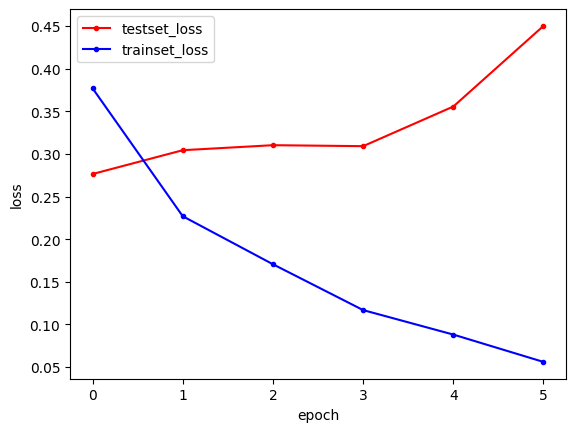

In [19]:
# 학습셋과 테스트셋의 오차를 그래프로 확인
y_loss = model.history.history['loss']
y_vloss = model.history.history['val_loss']

x_len = np.arange(len(y_loss))   # x축 생성

import matplotlib.pyplot as plt

plt.plot(x_len, y_vloss, marker='.', c='red', label='testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='trainset_loss')

plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
# 자연어 처리를 위한 딥러닝
## 데이터 전처리 작업
# 0. 불필요한 단어 또는 문장 제거
# 1. 문장을 단어로 토큰화
# 2. 각 문장을 인덱스의 배열로 변환시킴
# 3. 각 문장을 같은 사이즈로 padding
# 4. 카테고리를 원-핫 인코딩 (옵션)

## 모델 설정및 실행
# model = Sequential()  # 모델 설정
# model.add(Embedding(단어 입력수, 압축사이즈))  # 단어 임베딩
# model.add(Conv1d())  # CNN 추가
# model.add(MaxPooling1D)  # 맥스풀링
# model.add(Dropout())   # 과적합 방지를 위한 dropout
# model.LSTM()        # 순서가 있는 자료를 처리하기 위한 RNN 방법
# model.add(Dense(클래스갯수, activation=''))

# model.compile()    # 모델 실행 옵션
# model.fit(X,y,epochs=, validation_split=, callbacks=[])   # 모델 실행

## 테스트 데이터의 정확도 확인
# model.evaluate(x_test, y_test)

## 모델을 사용해서 예측
# model.predict(예측하고자 하는 자료)    #  클래스별 확률 반환 -> 가장 큰 확률 찾음